In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyhht.visualization import plot_imfs
from pyhht.emd import EMD
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14,10)

In [2]:
df = pd.read_csv("Data/sample_10s_lr2.csv", index_col=0)

In [3]:
df.head()

,timestamp,0,1,2,3,4,5,6,7
0,8067.201529,-187500.015625,-28049.115234,-6624.476074,27519.625000,-9427.384766,-187500.046875,31298.343750,14856.869141
1,8067.201656,-187500.015625,-28514.433594,-6360.680664,27120.220703,-9289.608398,-187500.046875,31624.097656,15042.657227
2,8067.201780,-187500.015625,-28732.810547,-5943.641602,25988.730469,-8927.443359,-187500.046875,32051.082031,15437.478516
3,8067.201907,-187500.015625,-28401.712891,-5943.306641,25679.427734,-8834.593750,-187500.046875,31997.169922,15503.303711
4,8067.202093,-187500.015625,-27973.855469,-6367.877930,26644.240234,-9143.472656,-187500.046875,31536.724609,15151.464844


In [4]:
data = df.as_matrix()

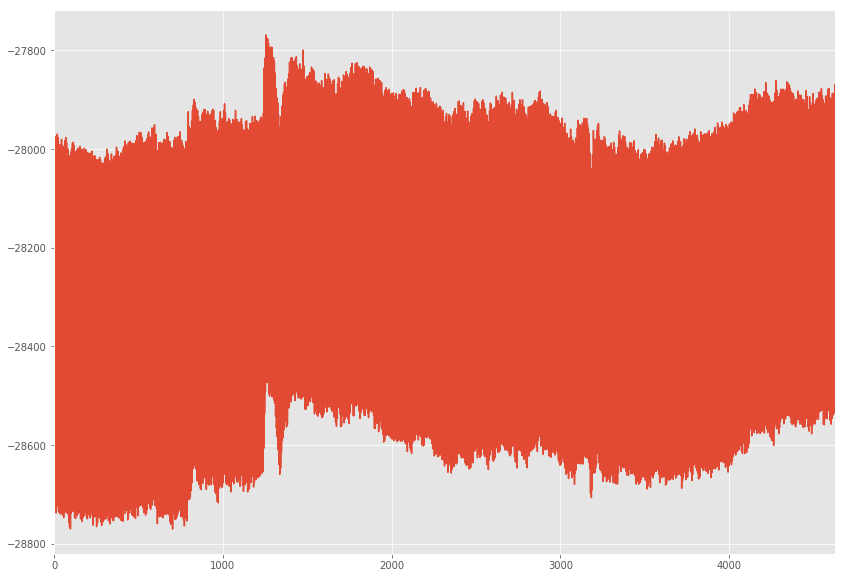

In [5]:
df['1'].plot()

In [6]:
data[:,1]

array([-187500.015625, -187500.015625, -187500.015625, ..., -187500.015625,
       -187500.015625, -187500.015625])

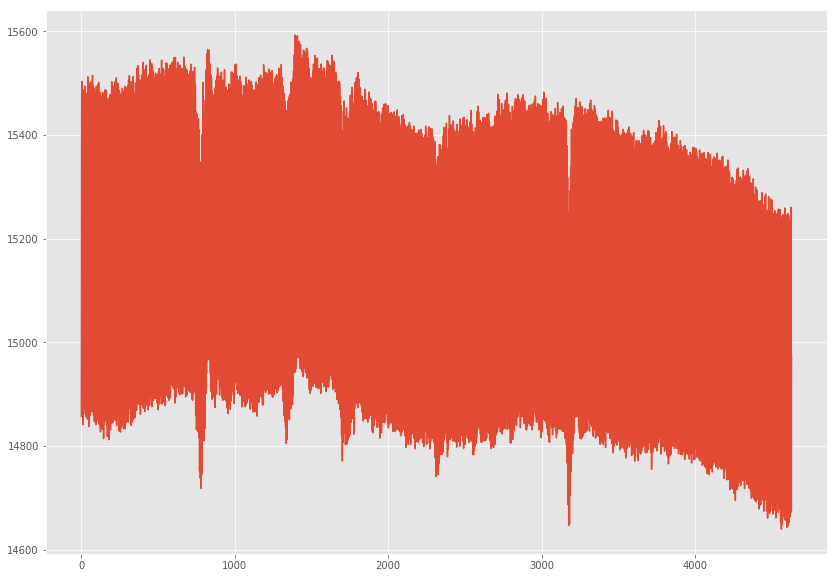

In [7]:
plt.plot(data[:,8])

2
3
4
5
6
7
8
9
10


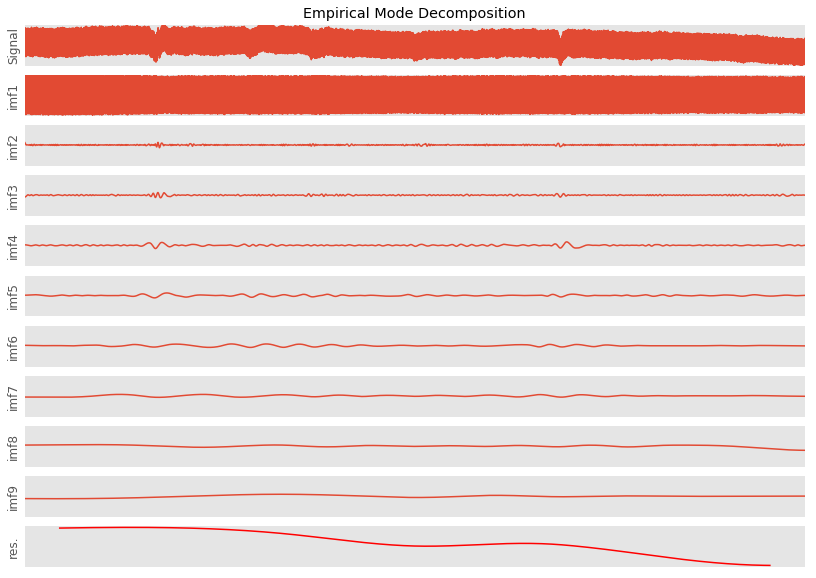

In [9]:
decomposer = EMD(data[:,8])
imfs = decomposer.decompose()
plot_imfs(data[:,8], imfs) 

In [10]:
signal = data[:,8] - imfs[0] - imfs[1] - imfs[-1]

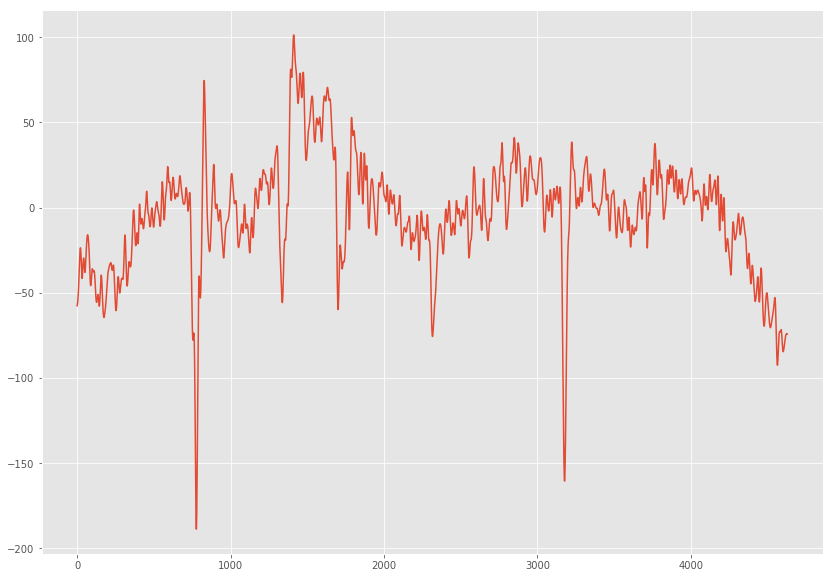

In [11]:
plt.plot(signal)

In [12]:
clean_data = np.zeros(np.shape(data))

In [13]:
for i in range(1, np.shape(data)[1]):
    if np.var(data[:,i]) < 1.0:
        continue
    decomposer = EMD(data[:,i])
    imfs = decomposer.decompose()
    clean_data[:, i] = data[:,i] - imfs[0] - imfs[1] - imfs[-1]

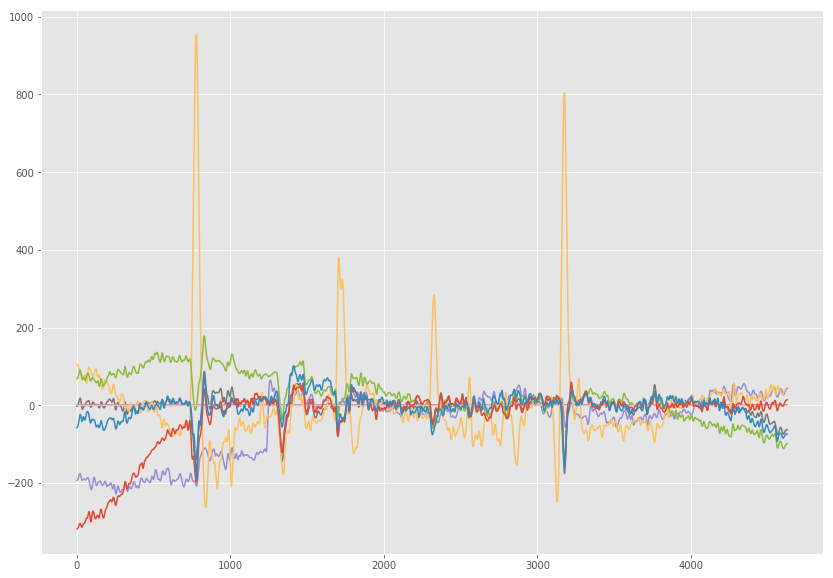

In [14]:
plt.plot(clean_data)

In [15]:
data[:,1]

array([-187500.015625, -187500.015625, -187500.015625, ..., -187500.015625,
       -187500.015625, -187500.015625])

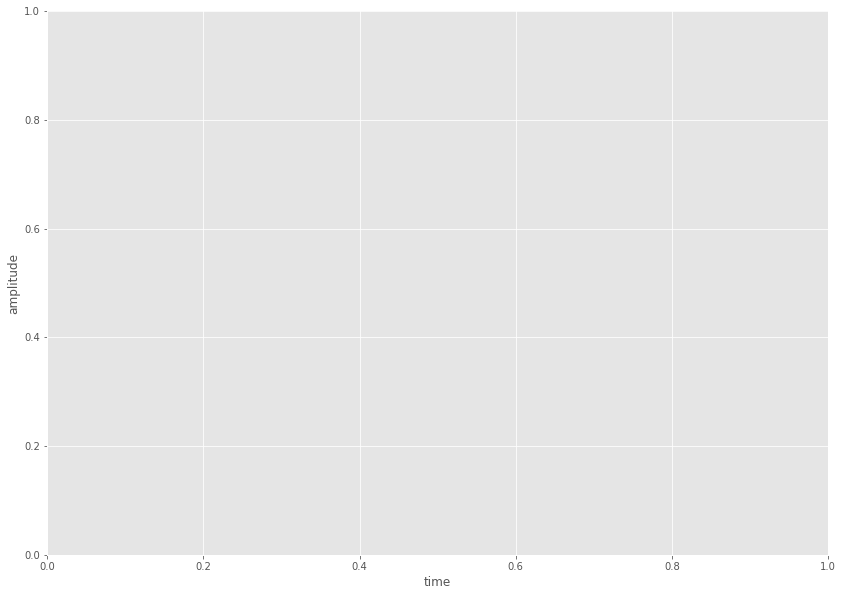

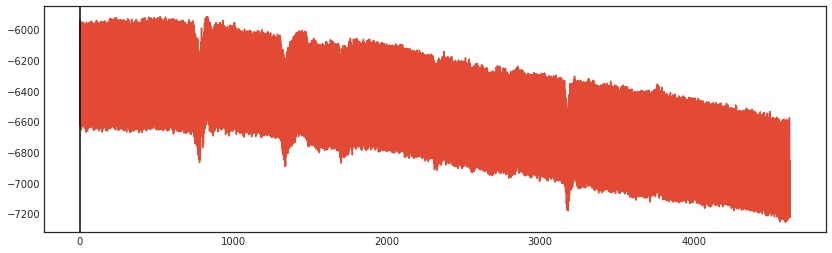

In [16]:
import seaborn as sns
plt.xlabel('time')
plt.ylabel('amplitude')
sns.set_style("white")
sns.despine()

fig, ax = plt.subplots()
ax.plot(range(len(data[:,3])), data[:,3])
ax.set_aspect('equal')

ax.axvline(x=0, color='k')

#plt.plot(data[:,3], color="black")

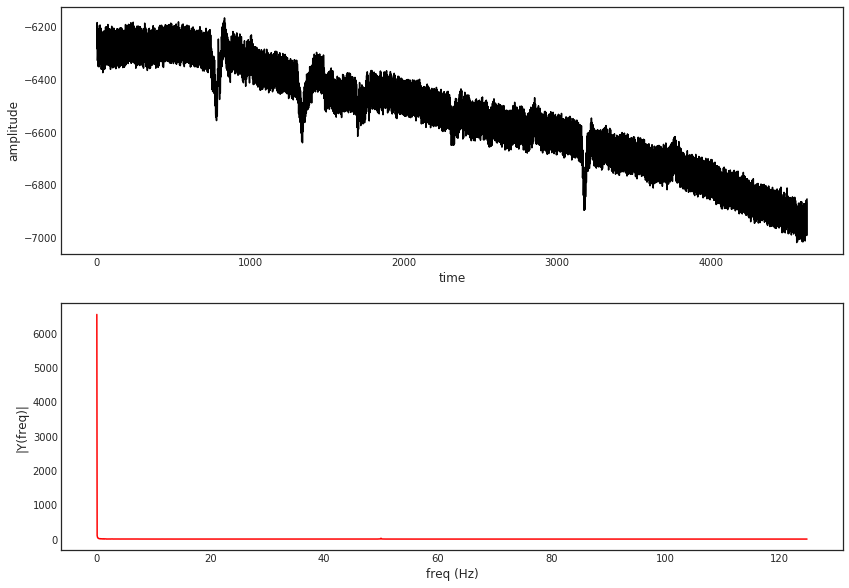

In [17]:
from scipy import fft
y = data[:,3] - imfs[0]
Fs = 250                         # sampling rate
Ts = 1.0/Fs                      # sampling interval
t = np.arange(0,1,Ts)            # time vector

plt.subplot(2,1,1)
plt.plot(y,'k-')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(2,1,2)
n = len(y)                       # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
freq = frq[range(n//2)]           # one side frequency range

Y = np.fft.fft(y)/n              # fft computing and normalization
Y = Y[range(n//2)]

plt.plot(freq, abs(Y), 'r-')
plt.xlabel('freq (Hz)')
plt.ylabel('|Y(freq)|')

plt.show()   

In [20]:
import os
path = 'Data/test_rate_limited/single_right'
files = []
count = 0
for i in os.listdir(path):
    files.append(i)

df = pd.read_csv(os.path.join(path, files[0]))
data = df.as_matrix()



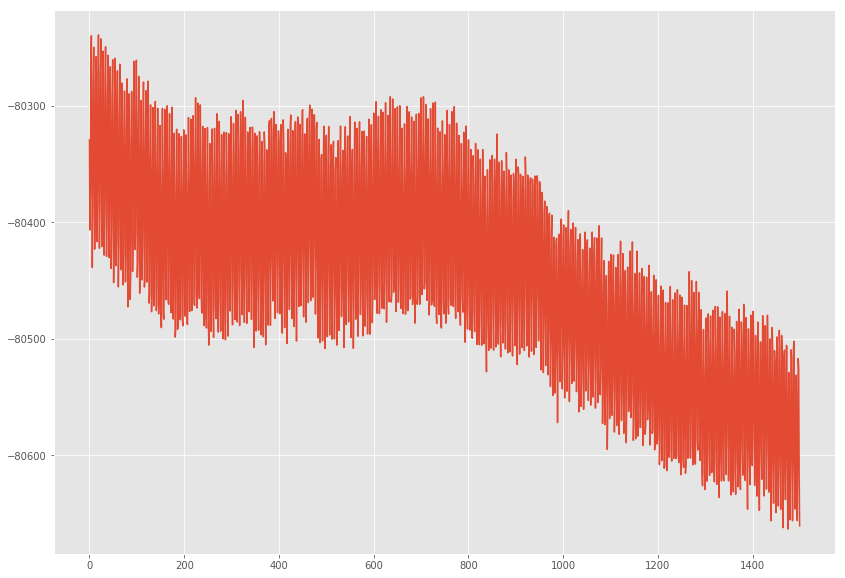

In [26]:
plt.plot(data[:,4])

2
3
4
5
6


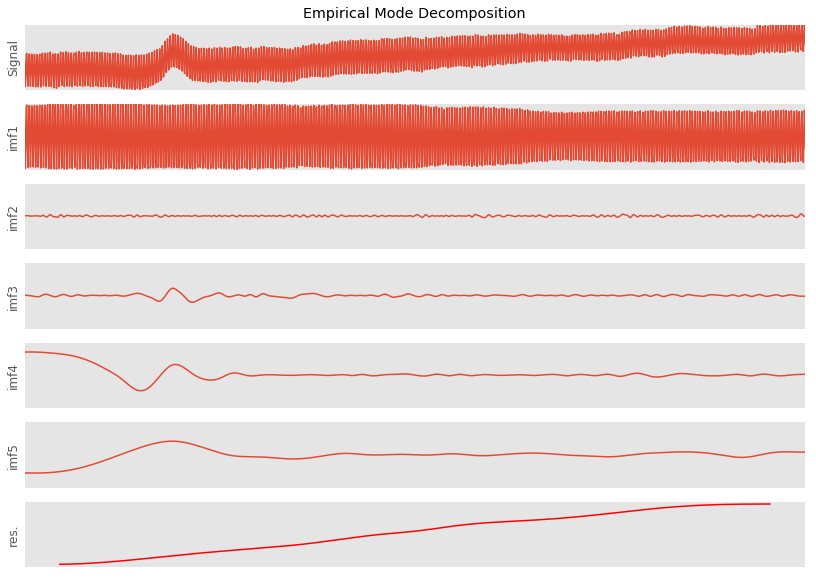

In [22]:
decomposer = EMD(data[:,2])
imfs = decomposer.decompose()
plot_imfs(data[:,2], imfs) 

In [23]:
data[-1, 0] - data[0,0]

5.9974230279995027